In [1]:
#Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from textblob import TextBlob
import string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import *
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Read the load dataset using the pandas 
train=pd.read_csv('/content/train_2kmZucJ.csv')
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
test=pd.read_csv('/content/test_oJQbWVk.csv')
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
#train data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [6]:
#Checking the shape of the traindataset
train.shape

(7920, 3)

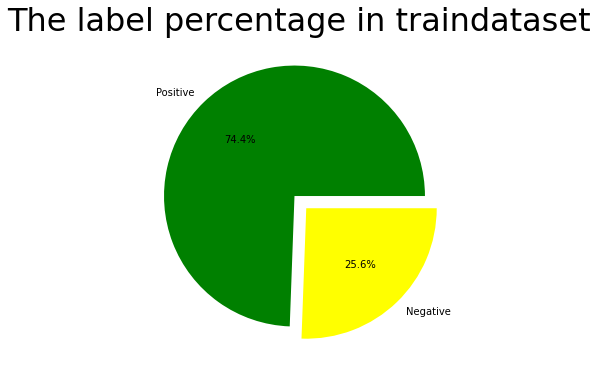

In [7]:
#to visualize the lable in the traindaset
label=train['label'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(18,6))
plt.pie(label,labels=['Positive','Negative'],colors=['green','yellow'],autopct='%1.1f%%',explode=[0.05,0.08])
#set the title name with fontsize 
plt.title("The label percentage in traindataset",fontsize=32)
plt.show()

In [8]:
train=shuffle(train)
train.head()

,id,label,tweet
2279,2280,1,@BA_Bird @R_M_E @Adam_Cottier Phone fucked can...
3430,3431,0,The moon that makes the earth glow... With lov...
5330,5331,0,#french #girl #swag #jonatic #funny #crazy #sh...
2933,2934,1,@jason_van_wyk went to get a #samsung other da...
7546,7547,0,ⓒ I win! #iphone #iphoneonly #iphonesia #art #...


Data Preprocessing

In [9]:
#Check the null value in the train datset
train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
#Let's drop the id from the train dataset
train.drop(['id'],axis=1,inplace=True)

In [11]:
#replace the null values with np.nan
train.replace(r'^\s*$',np.nan,regex=True,inplace=True)
train.dropna(axis=0,how='any',inplace=True)
#Apply to the test data
test.replace(r'^\s*$',np.nan,regex=True,inplace=True)
test.dropna(axis=0,how='any',inplace=True)

In [12]:
train.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
print('escape seq removed')
test.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
print('escape seq removed')

escape seq removed
escape seq removed


In [13]:
train['tweet']=train['tweet'].str.encode('ascii','ignore').str.decode('ascii')
print('non ascii is remove')
test['tweet']=test['tweet'].str.encode('ascii','ignore').str.decode('ascii')
print('non ascii is remove')

non ascii is remove
non ascii is remove


In [14]:
#Creat the function and remove the punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
#And apply function to the train dataset
train['tweet']=train['tweet'].apply(remove_punctuation)
test['tweet']=test['tweet'].apply(remove_punctuation)

In [15]:
#create the remove the stopwords
stop_words_list=nltk.corpus.stopwords.words('english')
stop_words_list.remove('no')
stop_words_list.remove('not')

In [16]:
#install the tokeninzer
tokenizer = ToktokTokenizer()
#Create function to remove the stopwords
def remove_stopwords(text,is_lower_case=True):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lower_case:
        filterd_tokens=[token for token in tokens if token not in stop_words_list]
    else:
        filterd_tokens=[token for token in tokens if token.lower() not in stop_words_list]
    filterd_text=' '.join(filterd_tokens)
    return filterd_text

In [17]:
train['tweet']=train['tweet'].apply(remove_stopwords)
test['tweet']=test['tweet'].apply(remove_stopwords)

In [18]:
#remove the special characters
def remove_special_characters(text):
    text=re.sub('[^a-zA-z0-9\s]','',text)
    return text

In [19]:
#apply the above function to the traindataset
train['tweet']=train['tweet'].apply(remove_special_characters)
test['tweet']=test['tweet'].apply(remove_special_characters)
train.head()

,label,tweet
2279,1,BABird RME AdamCottier Phone fucked send messa...
3430,0,The moon makes earth glow With love supermoon ...
5330,0,french girl swag jonatic funny crazy shoesunbr...
2933,1,jasonvanwyk went get samsung day advised not
7546,0,I win iphone iphoneonly iphonesia art selfie n...


In [20]:
#Remove html patternst
def remove_html(text):
    html_pattran=re.compile('<.*?>')
    return html_pattran.sub(r' ',text)
#And apply the above function to the train data
train['tweet']=train['tweet'].apply(remove_html)
test['tweet']=test['tweet'].apply(remove_html)

In [21]:
#Remove the html url from the train dataset
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)
#And apply to the train dataset
train['tweet']=train['tweet'].apply(remove_url)
test['tweet']=test['tweet'].apply(remove_url)

In [22]:
#Remove the numbers in the dataset
def remove_numbers(text):
    text=''.join([i for i in text if  not i.isdigit()])
    return text
#And apply the above function to the train data
train['tweet']=train['tweet'].apply(remove_numbers)
test['tweet']=test['tweet'].apply(remove_numbers)

In [23]:
def cleanse(word):
    rx=re.compile(r'\D*\d')
    if rx.match(word):
        return ' '
    return word
#Remove the alpha numaric
def alpha_numeric(strings):
    nstrings=[" ".join(filter(None,(cleanse(word) for word in string.split()))) for string in strings.split()]
    str1=" ".join(nstrings)
    return str1
#Apply to the above function to the train dataset
train['tweet']=train['tweet'].apply(alpha_numeric)
test['tweet']=test['tweet'].apply(alpha_numeric)

In [24]:
#lemmatizer
def lemmatize(text):
    text=nlp(text)
    text=" ".join([word.lemma_ if word.lemma_!='-PRON-' else word for word in text])
    return text
#Apply the above function to the rain dataset
train['tweet']=train['tweet'].apply(lemmatize)
test['tweet']=test['tweet'].apply(lemmatize)

In [25]:
train.head()

,label,tweet
2279,1,BABird RME AdamCottier Phone fuck send message...
3430,0,the moon make earth glow with love supermoon e...
5330,0,french girl swag jonatic funny crazy shoesunbr...
2933,1,jasonvanwyk go get samsung day advise not
7546,0,I win iphone iphoneonly iphonesia art selfie n...


In [26]:
#Divide the dataset two varible
X=train['tweet'] .values
y=train['label'].values

In [27]:
X

array(['BABird RME AdamCottier Phone fuck send message name',
       'the moon make earth glow with love supermoon earth magic iphone httpsinstagramcomptepixg',
       'french girl swag jonatic funny crazy shoesunbroken apple lovatic joke summer smil httpinstagrampOBScEIh',
       ...,
       'I m Otw bigbang concert Bigbang samsung galaxy tour Singapore nd night httpinstagrampQJBRLmHA',
       'long line innout beautifffull day food outside free live iphone photo feelslik httpinstagrampjsoegxhnl',
       'receive new iphone x thank u httpbitlyglspiw iphone apple io appleiphone iphonex phone'],
      dtype=object)

In [28]:
id=test['id']
test_pred=test['tweet'].values
len(test_pred)

1953

In [29]:
#Covert the text into araay using the TfidfVectorizer because the our machine can't learn categorical data
from sklearn.feature_extraction.text import TfidfVectorizer
#install the model
vector=TfidfVectorizer(lowercase=False)
vector.fit(X)
vector.fit(test_pred)
#Transform the above fit the data using the TfidfVectorizer and finally print it
X=vector.fit_transform(X)
#test_x=vector.fit_transform(test_pred)
X

<7920x22875 sparse matrix of type '<class 'numpy.float64'>'
	with 95739 stored elements in Compressed Sparse Row format>

In [30]:
test_pred

array(['I hate new iphone upgrade will not let download app ugh apple suck',
       'currently shit fucking pant apple iMac cashmoney radd swagswagswag httpinstagrampuuisbibzo',
       'I d like put cdrom iPad possible yes would not block screen', ...,
       'there go crack right across screen if could actually provide durable screen would great Apple Iphone',
       'codeofinter say Adobe big time may well include apple',
       'finally I get thanx father Samsung galaxy s gift father phone new httpinstagrampNoxkiPE'],
      dtype=object)

In [31]:
#divided the data for train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=120)

In [32]:
#instancy the Logistiregression model
logistic=LogisticRegression(C = 4, max_iter = 1200, n_jobs=15)
#And fit the data to the model
logistic.fit(X_train,y_train)
#Prediction to the data
logistic_pred=logistic.predict(X_test)

In [33]:
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100:.2f}')

The Logisticregression model test score is 87.48
The Logisticregression model train scores is 96.95


The logisticRegression accuracy_score 87.48
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       781
           1       0.78      0.68      0.72       249

    accuracy                           0.87      1030
   macro avg       0.84      0.81      0.82      1030
weighted avg       0.87      0.87      0.87      1030



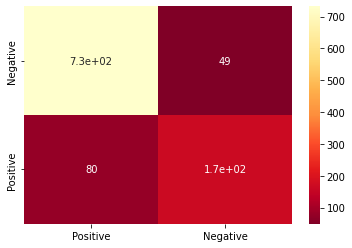

In [34]:
#import the accuracy_score and classification report to the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#Check the accuracy_score to the model
print(f'The logisticRegression accuracy_score {accuracy_score(y_test,logistic_pred)*100:.2f}')
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='YlOrRd_r',xticklabels=['Positive','Negative'],yticklabels=['Negative','Positive'])

**DecisionTreeClassifier**

In [35]:
#install the DecisionTreeCalssifier
from sklearn.tree import DecisionTreeClassifier
#Install the model
tree=DecisionTreeClassifier(random_state=42)
#fit the model to the train data
tree.fit(X_train,y_train)
#prediction
tree_pred=tree.predict(X_test)

The DecisiontreeClassification model test score is 82.91
The DecisiontreeClassification model train scores is 99.99
The DecisiontreeClassification accuracy_score 82.91
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       781
           1       0.65      0.63      0.64       249

    accuracy                           0.83      1030
   macro avg       0.77      0.76      0.77      1030
weighted avg       0.83      0.83      0.83      1030



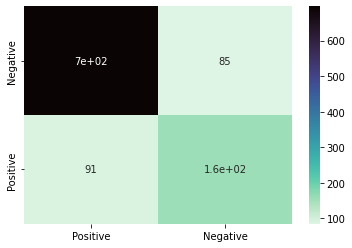

In [36]:
#Check the test score and train score to the model
print(f'The DecisiontreeClassification model test score is {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The DecisiontreeClassification model train scores is {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The DecisiontreeClassification accuracy_score {accuracy_score(y_test,tree_pred)*100:.2f}')
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='mako_r',xticklabels=['Positive','Negative'],yticklabels=['Negative','Positive'])

**RandomForestClassifier**

> Indented block

> Indented block

---



---







In [37]:
#Import the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model 
random=RandomForestClassifier()
#fit the train data to mode
random.fit(X_train,y_train)
#prediction
random_pred=random.predict(X_test)

In [38]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,random_pred)*100:.2f}')

The RandomForestClassifier model test score is 86.41
The RandomForestClassifier model train scores is 99.99
The RandomForestClassifier accuracy_score 86.41


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       781
           1       0.76      0.65      0.70       249

    accuracy                           0.86      1030
   macro avg       0.82      0.79      0.80      1030
weighted avg       0.86      0.86      0.86      1030



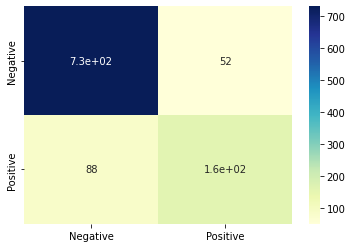

In [39]:
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])

In [40]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)
#Prediction to the test data
multinomial_pred=multinomial.predict(X_test)

In [41]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The RandomForestClassifier model test score is 85.24
The RandomForestClassifier model train scores is 92.58
The RandomForestClassifier accuracy_score 85.24


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       781
           1       0.79      0.53      0.63       249

    accuracy                           0.85      1030
   macro avg       0.83      0.74      0.77      1030
weighted avg       0.85      0.85      0.84      1030



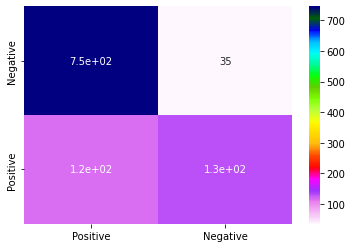

In [42]:
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='gist_ncar_r',xticklabels=['Positive','Negative'],yticklabels=['Negative','Positive'])

In [43]:
#import theXGBClssifier
from xgboost import XGBClassifier
#install the model
xgb=XGBClassifier()
#fit the data
xgb.fit(X_train,y_train)
#Prediction to the test data
xgb_pred=xgb.predict(X_test)

In [44]:
#Check the test score and train score to the model
print(f'The XGBClassifier model test score is {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The XGBClassifier model train scores is {xgb.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The XGBClassifier accuracy_score {accuracy_score(y_test,xgb_pred)*100:.2f}')

The XGBClassifier model test score is 84.08
The XGBClassifier model train scores is 85.92
The XGBClassifier accuracy_score 84.08


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       781
           1       0.75      0.51      0.61       249

    accuracy                           0.84      1030
   macro avg       0.81      0.73      0.75      1030
weighted avg       0.83      0.84      0.83      1030



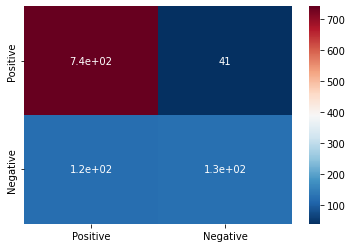

In [45]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='RdBu_r',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])

In [46]:
#Import the AdaBosstClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Install the model
adam=AdaBoostClassifier()
#Fit the traiing data to the model
adam.fit(X_train,y_train)
#AdaBoostClassifier prediction to the dataset
adam_pred=adam.predict(X_test)

In [47]:
#Check the test score and train score to the model
print(f'The AdaBoostClassifier model test score is {adam.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The AdaBoostClassifier model train scores is {adam.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The AdaBoostClassifier accuracy_score {accuracy_score(y_test,adam_pred)*100:.2f}')

The AdaBoostClassifier model test score is 84.37
The AdaBoostClassifier model train scores is 86.08
The AdaBoostClassifier accuracy_score 84.37


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       781
           1       0.72      0.57      0.64       249

    accuracy                           0.84      1030
   macro avg       0.80      0.75      0.77      1030
weighted avg       0.84      0.84      0.84      1030



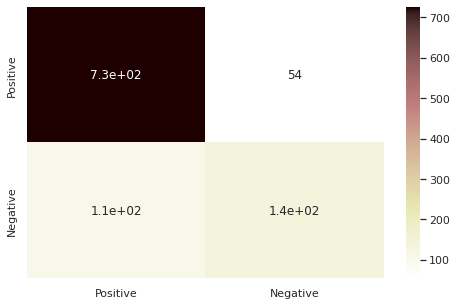

In [48]:
#Classification report
print(classification_report(y_test,adam_pred))
#confusion_matrix
cn=confusion_matrix(y_test,adam_pred)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(cn,annot=True,cmap='pink_r',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])

In [49]:
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR = GradientBoostingClassifier(**{
    "n_estimators":250,
    "max_depth":10,
    "learning_rate":0.1,
})


# fitting the model on train data

GBR.fit(X_train,y_train)
#Prediction of the GradientBoostingClassifier
GBR_pred=GBR.predict(X_test)

In [50]:
#Check the test score and train score to the model
print(f'The GradientBoostingClassifier model test score is {GBR.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The GradientBoostingClassifier model train scores is {GBR.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The GradientBoostingClassifier accuracy_score {accuracy_score(y_test,GBR_pred)*100:.2f}')

The GradientBoostingClassifier model test score is 86.89
The GradientBoostingClassifier model train scores is 99.99
The GradientBoostingClassifier accuracy_score 86.89


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       781
           1       0.76      0.67      0.71       249

    accuracy                           0.87      1030
   macro avg       0.83      0.80      0.81      1030
weighted avg       0.86      0.87      0.87      1030



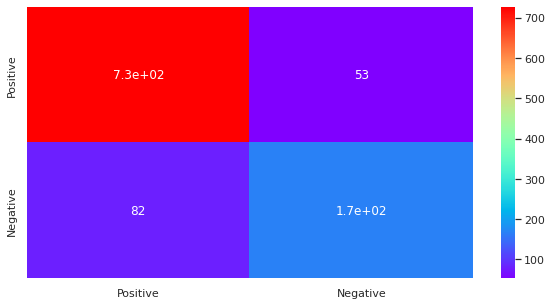

In [51]:
#Classification report
print(classification_report(y_test,GBR_pred))
#confusion_matrix
cn=confusion_matrix(y_test,GBR_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='rainbow',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])

In [52]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#Install the CatBoostClassifier
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
#fit the traing data to the CatBoostClassifier
clf.fit(X_train,y_train)

#prediction of the CatBoostClassifier
clf_pred=clf.predict(X_test)


Learning rate set to 0.023488
0:	learn: 0.6816587	total: 204ms	remaining: 3m 23s
1:	learn: 0.6713477	total: 360ms	remaining: 2m 59s
2:	learn: 0.6602166	total: 538ms	remaining: 2m 58s
3:	learn: 0.6512690	total: 751ms	remaining: 3m 6s
4:	learn: 0.6421377	total: 866ms	remaining: 2m 52s
5:	learn: 0.6327973	total: 1.04s	remaining: 2m 51s
6:	learn: 0.6233324	total: 1.27s	remaining: 3m
7:	learn: 0.6156621	total: 1.4s	remaining: 2m 53s
8:	learn: 0.6052624	total: 1.52s	remaining: 2m 47s
9:	learn: 0.5980158	total: 1.64s	remaining: 2m 42s
10:	learn: 0.5909193	total: 1.78s	remaining: 2m 40s
11:	learn: 0.5832122	total: 1.91s	remaining: 2m 37s
12:	learn: 0.5762437	total: 2.03s	remaining: 2m 34s
13:	learn: 0.5694713	total: 2.15s	remaining: 2m 31s
14:	learn: 0.5630025	total: 2.28s	remaining: 2m 29s
15:	learn: 0.5570556	total: 2.39s	remaining: 2m 27s
16:	learn: 0.5517055	total: 2.52s	remaining: 2m 25s
17:	learn: 0.5465971	total: 2.64s	remaining: 2m 23s
18:	learn: 0.5418757	total: 2.78s	remaining: 2m 23

In [54]:
#Check the test score and train score to the model
print(f'The CatBoostClassifier model test score is {clf.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The CatBoostClassifier model train scores is {clf.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The CatBoostClassifier accuracy_score {accuracy_score(y_test,clf_pred)*100:.2f}')

The CatBoostClassifier model test score is 86.12
The CatBoostClassifier model train scores is 91.89
The CatBoostClassifier accuracy_score 86.12


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       781
           1       0.76      0.62      0.68       249

    accuracy                           0.86      1030
   macro avg       0.82      0.78      0.80      1030
weighted avg       0.86      0.86      0.86      1030



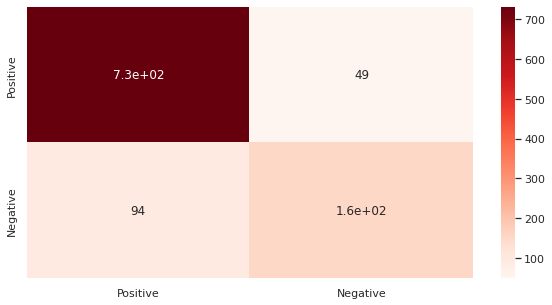

In [55]:
#Classification report
print(classification_report(y_test,clf_pred))
#confusion_matrix
cn=confusion_matrix(y_test,clf_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='Reds',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])

In [56]:
#install the Kneighborsclassifier from the sklearn
from sklearn.neighbors import KNeighborsClassifier
#Install the KNeighborsClassifier
knn = KNeighborsClassifier()
#And the fit the training dataset
knn.fit(X_train, y_train)
#Prediction of the KNeighborsClassifier
knn_pred=knn.predict(X_test)

In [57]:
#Check the test score and train score to the model
print(f'The KNeighborsClassifier model test score is {knn.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The KNeighborsClassifier model train scores is {knn.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The KNeighborsClassifier accuracy_score {accuracy_score(y_test,knn_pred)*100:.2f}')

The KNeighborsClassifier model test score is 86.60
The KNeighborsClassifier model train scores is 91.04
The KNeighborsClassifier accuracy_score 86.60


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       781
           1       0.69      0.82      0.75       249

    accuracy                           0.87      1030
   macro avg       0.81      0.85      0.83      1030
weighted avg       0.88      0.87      0.87      1030



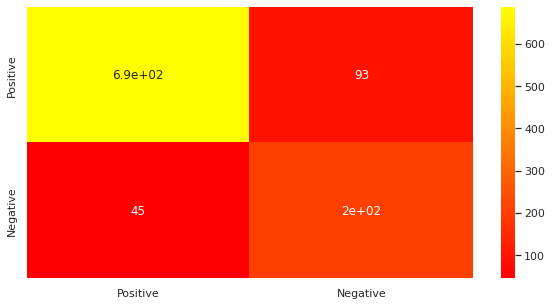

In [58]:
#Classification report
print(classification_report(y_test,knn_pred))
#confusion_matrix
cn=confusion_matrix(y_test,knn_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='autumn',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])

In [59]:
# Fit a support vector classifier model to the train dataset
#import SVC
from sklearn.svm import SVC
# Instantiate the model
svc =SVC()
#fit the model on train data
svc.fit(X_train,y_train)
#Prediction of the support vector classifier
svc_pred=svc.predict(X_test)


In [60]:
#Check the test score and train score to the model
print(f'The support vector classifier model test score is {svc.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The support vector classifier model train scores is {svc.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The support vector classifier accuracy_score {accuracy_score(y_test,svc_pred)*100:.2f}')


The support vector classifier model test score is 87.18
The support vector classifier model train scores is 98.94
The support vector classifier accuracy_score 87.18


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       781
           1       0.77      0.67      0.72       249

    accuracy                           0.87      1030
   macro avg       0.83      0.80      0.82      1030
weighted avg       0.87      0.87      0.87      1030



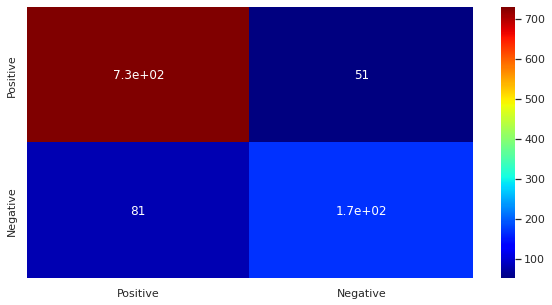

In [61]:

#Classification report
print(classification_report(y_test,svc_pred))
#confusion_matrix
cn=confusion_matrix(y_test,svc_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='jet',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])


In [62]:
from lightgbm import LGBMClassifier
#install the LGBMClassifier
lgh=LGBMClassifier()
#fit the train data to the model
lgh.fit(X_train,y_train)
#Prdiction
lgh_pred=lgh.predict(X_test)

In [63]:
#Check the test score and train score to the model
print(f'The LGBMClassifier model test score is {lgh.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The LGBMClassifier model train scores is {lgh.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The LGBMClassifier accuracy_score {accuracy_score(y_test,lgh_pred)*100:.2f}')


The LGBMClassifier model test score is 86.31
The LGBMClassifier model train scores is 93.88
The LGBMClassifier accuracy_score 86.31


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       781
           1       0.72      0.71      0.72       249

    accuracy                           0.86      1030
   macro avg       0.81      0.81      0.81      1030
weighted avg       0.86      0.86      0.86      1030



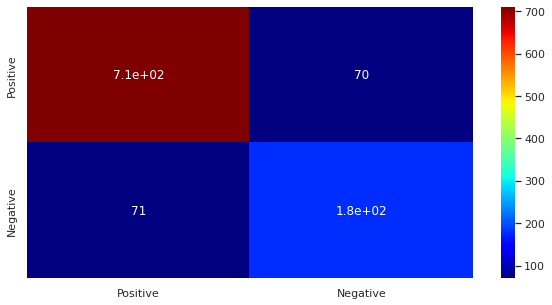

In [64]:
#Classification report
print(classification_report(y_test,lgh_pred))
#confusion_matrix
cn=confusion_matrix(y_test,lgh_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='jet',xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative'])


In [65]:
test.columns

Index(['id', 'tweet'], dtype='object')

In [68]:
test_pred=vector.transform(test_pred)

In [69]:
#Predictions of the test dataset
label=svc.predict(test_pred)
label

array([1, 1, 1, ..., 1, 1, 0])

In [74]:
submission=pd.DataFrame({'id':id,'label':label})
submission.to_csv('Sentimental.csv',index=False)